<h1 align='center'> Spam Classification </h1>
<h3 align='center'> By WCui</h3>

# 1. Data

In [1]:
# Import modules
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

We have two datasets. The first one is the training dataset and the second one is the test dataset. 

In [2]:
# read the train data and test data
dat1 = pd.read_csv('train_data.csv')
dat2 = pd.read_csv('test_data.csv')

In [3]:
dat1.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.0,0.90,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.170,0.170,0.000,6.266,41,94,1
1,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,1.00,...,0.000,0.000,0.0,0.000,0.000,0.000,2.413,15,70,0
2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.000,0.143,0.0,0.143,0.000,0.000,1.370,4,37,0
3,0.0,0.22,0.22,0.0,0.0,0.0,0.0,0.0,0.22,2.75,...,0.028,0.114,0.0,0.919,0.229,0.028,4.444,138,400,1
4,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.555,3.000,14,348,0


In [4]:
dat1.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [5]:
# show the count of the 'class'
pd.crosstab(index=dat1['class'],columns="count")

col_0,count
class,
0,1951
1,1269


In [6]:
dat1.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.103264,0.212137,0.285643,0.062012,0.312714,0.097652,0.114876,0.102121,0.083475,0.238975,...,0.036741,0.141395,0.016743,0.281914,0.074825,0.038620,4.848584,50.630745,285.590994,0.394099
std,0.303500,1.284390,0.510983,1.334705,0.677586,0.259596,0.399012,0.375549,0.267773,0.657438,...,0.216996,0.294814,0.090718,0.907724,0.212761,0.259533,27.557077,210.980122,635.938564,0.488732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,36.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.283000,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.432500,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315750,0.054000,0.000000,3.704250,43.000000,264.000000,1.000000
max,4.340000,14.280000,5.100000,42.810000,9.090000,2.940000,7.270000,6.060000,5.260000,18.180000,...,4.385000,9.752000,2.777000,32.478000,5.300000,7.407000,1102.500000,9989.000000,15841.000000,1.000000


# 2. Data Preparation

The objective is to detect wheather the Email is spam or not. The other variables are the predictors. 
Dat1 is the training dataset and dat2 is the test dataset. 

In [7]:
train_y = dat1['class']

In [8]:
train_X = dat1.drop(['class'],axis=1)

In [9]:
test_y = dat2['class']

In [10]:
test_X = dat2.drop(['class'], axis=1)

In [11]:
test_y.shape

(1381,)

In [12]:
test_X.shape

(1381, 57)

Normalize the X variables.

In [13]:
# Normalize columns in X to range [0,1]
trainX_scale = preprocessing.minmax_scale(train_X, feature_range=(0, 1), axis=0)
testX_scale = preprocessing.minmax_scale(test_X, feature_range=(0, 1), axis=0)

# 3. Logistic Regression

Since this the imbalanced dataset, class_weight will be assigned.

In [14]:
from sklearn.linear_model import LogisticRegression
# Assign class_weight as 5 for class 1 (class 0 will have 1 as class weight by default)
logit = LogisticRegression(class_weight={1:5})
logit.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight={1: 5}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
pred_y_logit = logit.predict(test_X)

In [20]:
# calculate the accuracy score
metrics.accuracy_score(test_y, pred_y_logit)

0.89427950760318609

In [21]:
# calculate the precision score
metrics.precision_score(test_y, pred_y_logit)

0.80151515151515151

In [22]:
# calculate the recall score
metrics.recall_score(test_y, pred_y_logit)

0.97242647058823528

In [23]:
# calculate the f1 score
metrics.f1_score(test_y, pred_y_logit)

0.87873754152823924

# 4. KNN 

In [24]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In this KNN model, weights will be assigned as 'distance' in order to balance the dataset. 

In [25]:
# initial the model
knn = KNeighborsClassifier()

# set the parameters, n_neighbors range from 2 to 31
params = {'n_neighbors': np.arange(2,31),
          'weights':['distance'],
          'algorithm':['auto']}

# tune the parameters using the GridSearchCV
model_knn = GridSearchCV(knn, param_grid = params)

# fit the model
model_knn.fit(trainX_scale,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'weights': ['distance'], 'algorithm': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
print('Best hyper parameters', model_knn.best_params_)

Best hyper parameters {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'}


In [28]:
# train the test datasets using the beset hyper parameters.
knn_final = neighbors.KNeighborsClassifier(n_neighbors = 12,
                                     weights = 'distance',
                                     algorithm = 'auto')

knn_final.fit(trainX_scale,train_y)
pred_y_knnfinal = knn_final.predict(testX_scale)

In [29]:
# calculate the accuracy score
metrics.accuracy_score(test_y, pred_y_knnfinal)

0.88776249094858795

In [30]:
# calculate the precision score
metrics.precision_score(test_y, pred_y_knnfinal)

0.90605427974947805

In [31]:
# calculate the recall score
metrics.recall_score(test_y, pred_y_knnfinal)

0.79779411764705888

In [32]:
# calculate the f1 score
metrics.f1_score(test_y, pred_y_knnfinal)

0.84848484848484851

# 5. Naive Bayes

In [33]:
from sklearn import naive_bayes

In [34]:
bernou_nb = naive_bayes.BernoulliNB()

In [35]:
bernou_nb.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [36]:
pred_y_bnb = bernou_nb.predict(test_X)

In [37]:
# Print confusion matrix
print(metrics.confusion_matrix(test_y, pred_y_bnb))

[[783  54]
 [ 91 453]]


In [38]:
# calculate the accuracy score
metrics.accuracy_score(test_y, pred_y_bnb)

0.89500362056480809

In [39]:
# calculate the precision score
metrics.precision_score(test_y, pred_y_bnb)

0.89349112426035504

In [40]:
# calculate the recall score
metrics.recall_score(test_y, pred_y_bnb)

0.83272058823529416

In [41]:
# calculate the f1 score
metrics.f1_score(test_y, pred_y_bnb)

0.8620361560418649

# 6. Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Train an SVC with linear kernel
rf = RandomForestClassifier(n_estimators=5, max_features=10, random_state=123)

In [44]:
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [45]:
# Show feature importance
rf.feature_importances_

array([  3.41473776e-03,   4.61219795e-03,   3.61771000e-03,
         1.98544438e-03,   1.71132222e-02,   4.07273271e-03,
         1.41391140e-01,   3.30793533e-03,   1.61939841e-03,
         6.63752082e-03,   5.74306267e-03,   9.29841820e-03,
         1.45852160e-03,   1.88337124e-03,   1.31749646e-04,
         1.19644203e-01,   8.25517510e-03,   4.67086712e-03,
         2.25377357e-02,   4.27835267e-03,   2.48113783e-02,
         5.20933919e-04,   3.12674752e-02,   6.28757953e-02,
         3.15985482e-02,   8.12757882e-03,   7.90495881e-03,
         4.40928202e-03,   8.88380999e-04,   3.15277798e-03,
         7.50845710e-04,   1.86529600e-03,   1.20316156e-03,
         2.41871364e-04,   1.64723008e-04,   1.99164582e-03,
         2.16345393e-02,   3.67378761e-04,   2.19286066e-03,
         1.58941752e-03,   9.77141096e-04,   4.03606274e-03,
         1.44291568e-03,   6.83289666e-04,   7.18722573e-03,
         1.91598789e-02,   0.00000000e+00,   1.09428750e-03,
         3.76890937e-03,

In [46]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
word_freq_remove,0.141391
char_freq_$,0.132016
char_freq_!,0.125109
word_freq_free,0.119644
word_freq_money,0.062876
capital_run_length_total,0.045317
capital_run_length_longest,0.042074
word_freq_hp,0.031599
word_freq_000,0.031267
capital_run_length_average,0.029863


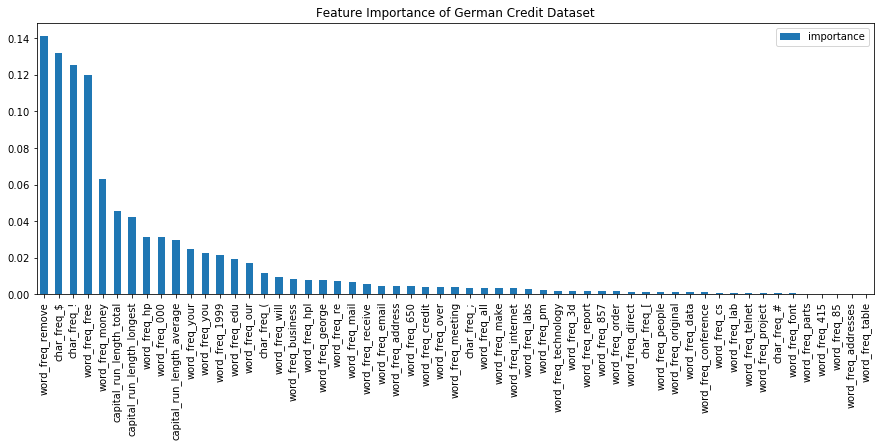

In [47]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of German Credit Dataset')

In [48]:
pred_y_rf = rf.predict(test_X)

In [49]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_rf))

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       837
          1       0.93      0.90      0.92       544

avg / total       0.93      0.93      0.93      1381



In [50]:
rf2 = RandomForestClassifier()

parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[5,10,20,30],
              'max_features':[3,5,10,30,50],
              'random_state':[123]}

grid_rf = model_selection.GridSearchCV(rf2, parameters, scoring='accuracy')

In [51]:
grid_rf.fit(train_X,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [5, 10, 20, 30], 'max_features': [3, 5, 10, 30, 50], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [52]:
# Show best parameters
grid_rf.best_params_

{'criterion': 'entropy',
 'max_features': 3,
 'n_estimators': 30,
 'random_state': 123}

In [53]:
# Train a new RF with best parameters, n_estimateros are 30 and max_features are 3.
rf_final = RandomForestClassifier(n_estimators=30, 
                                  max_features=3, 
                                  criterion='entropy',
                                  random_state=123)

In [54]:
rf_final.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [55]:
# Predict on test set
pred_y_rffinal = rf_final.predict(test_X)

In [57]:
# calculate the accuracy score
metrics.accuracy_score(test_y, pred_y_rffinal)

0.95220854453294712

In [58]:
# calculate the precision score
metrics.precision_score(test_y, pred_y_rffinal)

0.95610687022900764

In [59]:
# calculate the recall score
metrics.recall_score(test_y, pred_y_rffinal)

0.92095588235294112

In [60]:
# calculate the f1 score
metrics.f1_score(test_y, pred_y_rffinal)

0.9382022471910112

# 7. Compare the models

The performance of the classification models are summarized below. 

In [61]:
acc = [metrics.accuracy_score(test_y, pred_y_logit),
       metrics.accuracy_score(test_y, pred_y_knnfinal),
       metrics.accuracy_score(test_y, pred_y_bnb),
       metrics.accuracy_score(test_y, pred_y_rffinal)]

pre = [metrics.precision_score(test_y, pred_y_logit),
       metrics.precision_score(test_y, pred_y_knnfinal),
       metrics.precision_score(test_y, pred_y_bnb),
       metrics.precision_score(test_y, pred_y_rffinal)]

rec = [metrics.recall_score(test_y, pred_y_logit),
       metrics.recall_score(test_y, pred_y_knnfinal),
       metrics.recall_score(test_y, pred_y_bnb),
       metrics.recall_score(test_y, pred_y_rffinal)]

f1 = [metrics.f1_score(test_y, pred_y_logit),
       metrics.f1_score(test_y, pred_y_knnfinal),
       metrics.f1_score(test_y, pred_y_bnb),
       metrics.f1_score(test_y, pred_y_rffinal)]


In [62]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 score':f1},
             index = ['Logistic Regression','K-Neearst Neighbors','Naive Bayes','Random Forest'])

,Accuracy,F1 score,Precision,Recall
Logistic Regression,0.894280,0.878738,0.801515,0.972426
K-Neearst Neighbors,0.887762,0.848485,0.906054,0.797794
Naive Bayes,0.895004,0.862036,0.893491,0.832721
Random Forest,0.952209,0.938202,0.956107,0.920956


In conclusion, random forest model is chosen based on its better F1 score and accuracy. The highest F1 score is 0.938202.